In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from sys import getsizeof
from scipy.optimize import curve_fit

In [2]:
# For writing data
data_subdirectory = "Data"
if not os.path.exists(data_subdirectory):
    os.makedirs(data_subdirectory)

# Setting the precision for floating points :
np.set_printoptions(precision=4)

In [3]:
# Define the hyperbolic function
def hyperbolic_fit(x, a, b):
    return a / x + b

In [4]:
def Size(var):
    print(f" Sys size : {getsizeof(var)}", end = ", ".rjust(8 - len(f"{getsizeof(var)}")))
    
    try:
        print(f" np size : {var.nbytes}", end = " ")
    except:
        print(" np size : NA", end = " ")

In [5]:
def test(vars, labels):
    '''
    Size and Type : Prints the label of the variable and the corresponding size(with overhead) and the numpy size(if applicable). Also shows the 
    datatype of the variable. All in a justified manner.

    Data Examples : Prints the first 10 elements of the very first dimension of an array/list (e.g. in case of a 3-D array, will print the 
    array[0, 0, :10] element). If the array is only 1-D, will print the first 10 elements. If it's a single variable, the value will be printed.
    Next to each array example, '*' will be printed. The number of '*' printed corresponding to an array shows its dimensions.
    '''
    max_len = len(max(labels, key = len))

    print("\nSize and Type :\n")
    for item, label in zip(vars, labels):
        print(f"{label} {':'.rjust(max_len + 2 - len(label))} ", end = " ") 
        Size(item), print("    ", type(item), end = " "), print("")

    print("\n\nData Examples :\n ")
    for item, label in zip(vars, labels):
        print(f"{label} {':'.rjust(max_len + 2 - len(label))} ", end = " ") 
        
        try :
            try :
                print(item[0, :10], "**")
            except :
                print(item[:10], "*")
        
        except :
            print(item)    

In [6]:
num_iter = 10    # To average over
in_range = 20    # Range of steps of initial length

write = True
eve_presence = True    #'Random'
ch_noise = 0.020     # 0.000 - 0.300, 0.050 V/s QBER (eve detection)
eve_threshold = 0.30    # QBER_threshold = eve_threshold - ch_noise ( 0.25(+-0.01) - 0.02 (+-0.001) = 0.23 +- 0.011 )
precision = 0.001 + 0.01    # = 0.011
Eve_detected = np.zeros((num_iter, in_range), dtype='uint8')

out_len = np.zeros((num_iter, in_range), dtype = 'uint16')    # Length of key output for various initial key sizes
time_taken = np.zeros((num_iter, in_range), dtype = 'float32')    # avg time taken by a key of a certain length
QBERs = np.zeros((num_iter, in_range), dtype = 'float16')

keys = np.full((num_iter, in_range), " ", dtype = object)

In [7]:
error_threshold = eve_threshold - ch_noise - precision
step = int(1000/in_range)
elements = num_iter*in_range
in_len = np.array([step*(i+1) for i in range(in_range)], dtype = 'uint16')

## Test and Checks

In [8]:
init_vars = [num_iter, in_range, in_len, write, eve_presence, ch_noise, eve_threshold, Eve_detected, out_len, time_taken, QBERs, keys]
init_labels = "num_iter, in_range, in_len, write, eve_presence, ch_noise, eve_threshold, Eve_detected, out_len, time_taken, QBERs, keys".split(", ")
    
test(init_vars, init_labels)


Size and Type :

num_iter       :   Sys size : 28    ,  np size : NA      <class 'int'> 
in_range       :   Sys size : 28    ,  np size : NA      <class 'int'> 
in_len         :   Sys size : 152   ,  np size : 40      <class 'numpy.ndarray'> 
write          :   Sys size : 28    ,  np size : NA      <class 'bool'> 
eve_presence   :   Sys size : 28    ,  np size : NA      <class 'bool'> 
ch_noise       :   Sys size : 24    ,  np size : NA      <class 'float'> 
eve_threshold  :   Sys size : 24    ,  np size : NA      <class 'float'> 
Eve_detected   :   Sys size : 328   ,  np size : 200      <class 'numpy.ndarray'> 
out_len        :   Sys size : 528   ,  np size : 400      <class 'numpy.ndarray'> 
time_taken     :   Sys size : 928   ,  np size : 800      <class 'numpy.ndarray'> 
QBERs          :   Sys size : 528   ,  np size : 400      <class 'numpy.ndarray'> 
keys           :   Sys size : 1728  ,  np size : 1600      <class 'numpy.ndarray'> 


Data Examples :
 
num_iter       :  10
in_ra

## Protocol

In [9]:
total_time = time.time()

for J in range(num_iter):    
    for I in range(in_range):
        print(f"I = {I + 1}", end = "  :  ")
        KEY_LENGTH = in_len[I]

        start = time.time()
        %run ./Qiskit_rebuilt_3.ipynb
        time_taken[J, I] = round(time.time() - start, 4)
        
        out_len[J, I] += len(key)
        keys[J, I] = str(key)
        QBERs[J, I] = QBER
        Eve_detected[J, I] = ((QBER >= error_threshold) and eve) + ((QBER < error_threshold) and not eve)    # Whether or not the DETECTION of Eve is CORRECT
        
    print(f"###################################### Iteration {J + 1} complete ######################################")

total_time = time.time() - total_time
print(total_time)

I = 1  :  Eve went unnoticed :  Key is secure
I = 2  :  Eve went unnoticed :  Key is secure
I = 3  :   Eve detected :  Key not secure
I = 4  :   Eve detected :  Key not secure
I = 5  :  Eve went unnoticed :  Key is secure
I = 6  :  Eve went unnoticed :  Key is secure
I = 7  :  Eve went unnoticed :  Key is secure
I = 8  :  Eve went unnoticed :  Key is secure
I = 9  :   Eve detected :  Key not secure
I = 10  :   Eve detected :  Key not secure
I = 11  :   Eve detected :  Key not secure
I = 12  :  Eve went unnoticed :  Key is secure
I = 13  :   Eve detected :  Key not secure
I = 14  :   Eve detected :  Key not secure
I = 15  :   Eve detected :  Key not secure
I = 16  :  Eve went unnoticed :  Key is secure
I = 17  :   Eve detected :  Key not secure
I = 18  :   Eve detected :  Key not secure
I = 19  :  Eve went unnoticed :  Key is secure
I = 20  :   Eve detected :  Key not secure
###################################### Iteration 1 complete ######################################
I = 1  :  Eve 

In [10]:
print(total_time)
elapsed_time = f"{str(int(total_time//3600))}h  {str( int((total_time%3600)//60) )}m  {str(int(total_time%60))}s"
elapsed_time

4660.056260347366


'1h  17m  40s'

In [11]:
time_taken

array([[ 4.3648,  7.7491, 11.5869, 15.4202, 18.9374, 23.1463, 28.3238,
        30.6814, 36.2341, 38.7389, 42.7235, 47.3096, 50.7404, 53.5134,
        58.2095, 62.2047, 66.4005, 69.5421, 73.4653, 77.5655],
       [ 3.7919,  7.5548, 12.0513, 15.1006, 19.0111, 23.3017, 27.9763,
        31.3163, 36.5359, 41.4674, 45.1421, 49.4441, 52.9124, 58.0435,
        62.2296, 65.3968, 70.0467, 74.0619, 73.8037, 77.9396],
       [ 3.9817,  7.5665, 12.1595, 14.9102, 19.3823, 23.3785, 27.4867,
        30.9911, 34.6434, 38.4392, 42.4604, 46.7765, 51.3737, 39.4679,
        38.0091, 41.3403, 63.9774, 47.7494, 48.98  , 45.5711],
       [ 1.8   ,  3.5242,  5.0491,  9.6722, 14.5546, 24.0276, 13.7943,
        14.9429, 32.2483, 40.4931, 42.3645, 46.9515, 54.441 , 57.4348,
        60.6279, 63.958 , 66.6509, 71.7818, 75.7404, 31.1653],
       [ 1.2203,  2.4985,  3.6367,  5.0241,  6.3526,  7.2966,  8.5777,
         9.6917, 11.0492, 12.1689, 13.6651, 16.578 , 16.6103, 17.6148,
        18.4487, 19.6474, 22.7329, 22.

In [12]:
Eve_detected

array([[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0]],
      dtype=uint8)

In [13]:
SKGR = np.array([ sum(1 for i in range(num_iter) if QBERs[i, j] < error_threshold) / sum(time_taken[:, j]) for j in range(in_range) ])    # Over all iterations
SKGR

array([0.2788, 0.1444, 0.0632, 0.0469, 0.0457, 0.036 , 0.04  , 0.0355,
       0.0145, 0.0257, 0.0157, 0.0213, 0.0195, 0.0255, 0.009 , 0.0085,
       0.0126, 0.0125, 0.0145, 0.0157])

In [14]:
# Open the files to write data to
title = f"\n[Noise {ch_noise}][Eve {eve_presence}][Eve Threshold {eve_threshold}] "
simulation_parameters = f"\nNumber of iterations : {num_iter},   Number of data points : {in_range}  :  Data points : {in_len},   Step Size : {step}, \nTotal number of cycles : {elements} \nEve Presence : {eve_presence},   Channel Noise : {ch_noise},   Eve's threshold : {eve_threshold},   Precision of Error Measurement : {precision},   Error Threshold : {error_threshold} \nTime Taken : {elapsed_time}\n"

avg_time_taken = np.array([sum([time_taken[J, I] for J in range(num_iter)])/num_iter for I in range(in_range)])
avg_out_len = np.array([sum([out_len[J, I] for J in range(num_iter)])/num_iter for I in range(in_range)])
avg_QBERs = np.array([sum([QBERs[J, I] for J in range(num_iter)])/num_iter for I in range(in_range)])

Eve's detection was incorrect : 103/200 times (= 0.515 ); for QBER Threshold : 0.26899999999999996
7
EveDetection[Noise 0.02]


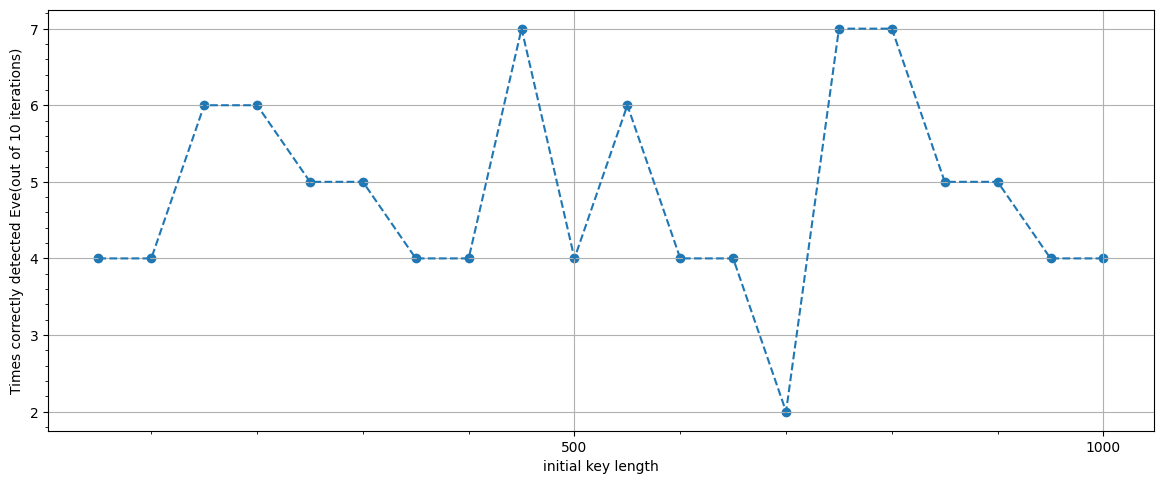

In [15]:
incorrect = elements - sum(sum(Eve_detected))
detection = f"Eve's detection was incorrect : {incorrect}/{elements} times (= {incorrect/elements} ); for QBER Threshold : {error_threshold}"
print(detection)
print(max(sum(Eve_detected)))
print(f'EveDetection[Noise {ch_noise}]')

plt.figure(figsize=(12, 5))

plt.xlabel(f'initial key length')
plt.ylabel(f'Times correctly detected Eve(out of {num_iter} iterations)')
xticks = (np.array([0]+ list(in_len)))[::10]
plt.xticks(xticks)
plt.yticks(np.arange(num_iter+1))

plt.minorticks_on()
plt.grid(True)
plt.tight_layout()
plt.scatter(in_len, sum(Eve_detected))
plt.plot(in_len, sum(Eve_detected), linestyle = '--')

In [16]:
vars = [num_iter, in_range, in_len, write, eve_presence, ch_noise, eve_threshold, Eve_detected, avg_out_len, avg_time_taken, avg_QBERs, SKGR, keys]  
labels = "num_iter, in_range, in_len, write, eve_presence, ch_noise, eve_threshold, Eve_detected, avg_out_len, avg_time_taken, avg_QBERs, SKGR, keys".split(", ")

test(vars, labels)


Size and Type :

num_iter        :   Sys size : 28    ,  np size : NA      <class 'int'> 
in_range        :   Sys size : 28    ,  np size : NA      <class 'int'> 
in_len          :   Sys size : 152   ,  np size : 40      <class 'numpy.ndarray'> 
write           :   Sys size : 28    ,  np size : NA      <class 'bool'> 
eve_presence    :   Sys size : 28    ,  np size : NA      <class 'bool'> 
ch_noise        :   Sys size : 24    ,  np size : NA      <class 'float'> 
eve_threshold   :   Sys size : 24    ,  np size : NA      <class 'float'> 
Eve_detected    :   Sys size : 328   ,  np size : 200      <class 'numpy.ndarray'> 
avg_out_len     :   Sys size : 272   ,  np size : 160      <class 'numpy.ndarray'> 
avg_time_taken  :   Sys size : 272   ,  np size : 160      <class 'numpy.ndarray'> 
avg_QBERs       :   Sys size : 272   ,  np size : 160      <class 'numpy.ndarray'> 
SKGR            :   Sys size : 272   ,  np size : 160      <class 'numpy.ndarray'> 
keys            :   Sys size : 1728

In [17]:
False_detections = [(i, j) for (i, j) in zip(np.where(Eve_detected == 0)[0], np.where(Eve_detected == 0)[1])]
print(False_detections[:9], '...')

[(0, 0), (0, 1), (0, 4), (0, 5), (0, 6), (0, 7), (0, 11), (0, 15), (0, 18)] ...


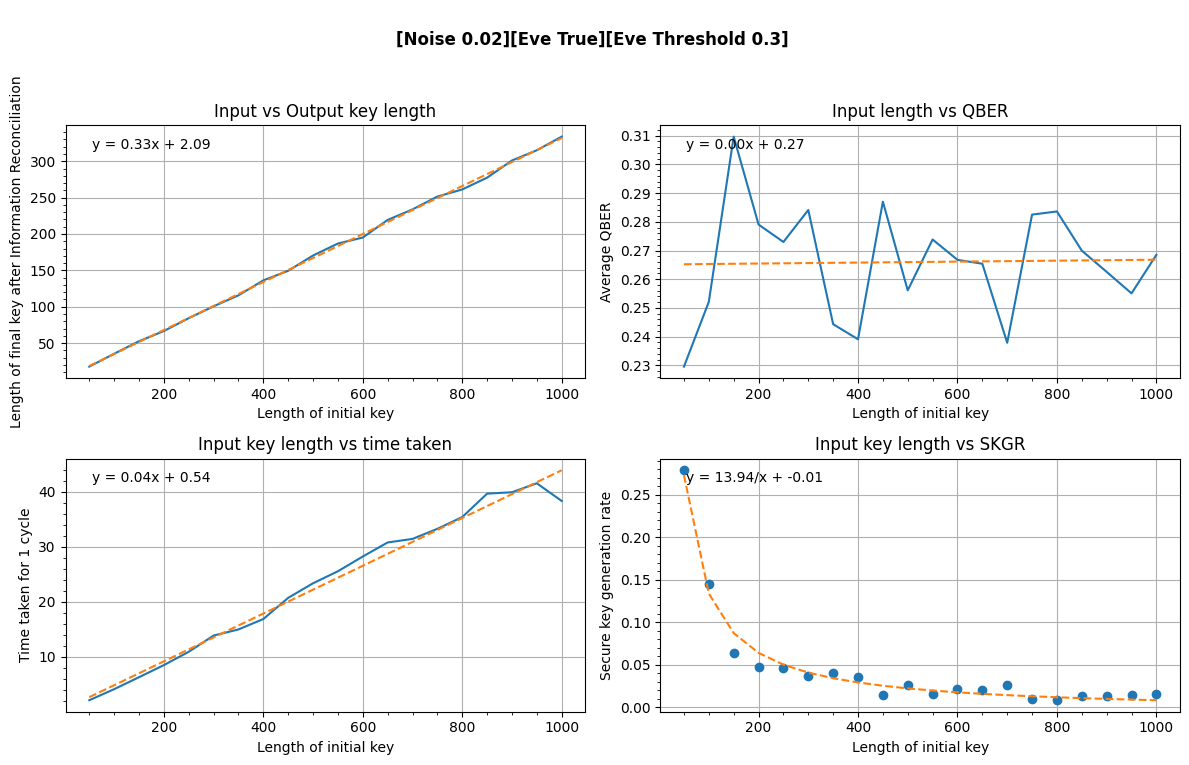


[Noise 0.02][Eve True][Eve Threshold 0.3] 


In [18]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# For key length
coefficients_len = np.polyfit(in_len, avg_out_len, 1)
polynomial_len = np.poly1d(coefficients_len)
equation_len = f'y = {coefficients_len[0]:.2f}x + {coefficients_len[1]:.2f}'
ax[0, 0].text(0.05, 0.95, equation_len, transform=ax[0, 0].transAxes, fontsize=10, verticalalignment='top')
ax[0, 0].set_xlabel('Length of initial key')
ax[0, 0].set_ylabel('Length of final key after Information Reconciliation')
ax[0, 0].set_title("Input vs Output key length")
ax[0, 0].plot(in_len, avg_out_len)
ax[0, 0].plot(in_len, polynomial_len(in_len), linestyle='--')
ax[0, 0].minorticks_on()
ax[0, 0].grid(True)

# For QBER
coefficients_qber = np.polyfit(in_len, avg_QBERs, 1)
polynomial_qber = np.poly1d(coefficients_qber)
equation_qber = f'y = {coefficients_qber[0]:.2f}x + {coefficients_qber[1]:.2f}'
ax[0, 1].text(0.05, 0.95, equation_qber, transform=ax[0, 1].transAxes, fontsize=10, verticalalignment='top')
ax[0, 1].set_xlabel('Length of initial key')
ax[0, 1].set_ylabel('Average QBER')
ax[0, 1].set_title("Input length vs QBER")
ax[0, 1].plot(in_len, avg_QBERs)
ax[0, 1].plot(in_len, polynomial_qber(in_len), linestyle='--')
ax[0, 1].minorticks_on()
ax[0, 1].grid(True)

# For time taken for 1 cycle
coefficients_tt = np.polyfit(in_len, avg_time_taken, 1)
polynomial_tt = np.poly1d(coefficients_tt)
equation_tt = f'y = {coefficients_tt[0]:.2f}x + {coefficients_tt[1]:.2f}'
ax[1, 0].text(0.05, 0.95, equation_tt, transform=ax[1, 0].transAxes, fontsize=10, verticalalignment='top')
ax[1, 0].set_xlabel('Length of initial key')
ax[1, 0].set_ylabel('Time taken for 1 cycle')
ax[1, 0].set_title("Input key length vs time taken")
ax[1, 0].plot(in_len, avg_time_taken)
ax[1, 0].plot(in_len, polynomial_tt(in_len), linestyle='--')
ax[1, 0].minorticks_on()
ax[1, 0].grid(True)

# # For Secure key generation rate
# coefficients_SKGR = np.polyfit(in_len, SKGR, 1)
# polynomial_SKGR = np.poly1d(coefficients_SKGR)
# equation_SKGR = f'y = {coefficients_SKGR[0]:.2f}x + {coefficients_SKGR[1]:.2f}'
# ax[1, 1].text(0.05, 0.95, equation_SKGR, transform=ax[1, 1].transAxes, fontsize=10, verticalalignment='top')
# ax[1, 1].set_xlabel('Length of initial key')
# ax[1, 1].set_ylabel('Secure key generation rate')
# ax[1, 1].set_title("Input key length vs SKGR")
# ax[1, 1].plot(in_len, SKGR)
# ax[1, 1].plot(in_len, polynomial_SKGR(in_len), linestyle='--')
# ax[1, 1].minorticks_on()
# ax[1, 1].grid(True)


# Assuming in_len and SKGR are your data arrays
# Fit the data to the hyperbolic function
popt, pcov = curve_fit(hyperbolic_fit, in_len, SKGR)
a, b = popt
# Generate the polynomial using the fitted parameters
fitted_SKGR = hyperbolic_fit(in_len, *popt)
equation_SKGR = f'y = {a:.2f}/x + {b:.2f}'
ax[1, 1].text(0.05, 0.95, equation_SKGR, transform=ax[1, 1].transAxes, fontsize=10, verticalalignment='top')
ax[1, 1].set_xlabel('Length of initial key')
ax[1, 1].set_ylabel('Secure key generation rate')
ax[1, 1].set_title("Input key length vs SKGR")
ax[1, 1].plot(in_len, SKGR, 'o', label='Data')  # Plot the original data
ax[1, 1].plot(in_len, fitted_SKGR, linestyle='--', label='Hyperbolic fit')  # Plot the hyperbolic fit
ax[1, 1].minorticks_on()
ax[1, 1].grid(True)


# Set the super title for the entire figure
plt.suptitle(title, weight='bold')

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print the title
print(title)


In [19]:
if write :
    filename = f"Data.txt"
    key_strings = f"Keys.txt"
    data_path = os.path.join(data_subdirectory, filename)
    key_path = os.path.join(data_subdirectory, key_strings)
    file = open(data_path, "a")
    file2 = open(key_path, "a")
    
    file.write(simulation_parameters)
    file2.write(simulation_parameters)

    
    file.write(f"\nInput Length = [{', '.join(map(str, in_len))}] \nAverage Time Taken = [{', '.join(map(str, avg_time_taken))}] \nAverage QBER = [{', '.join(map(str, avg_QBERs))}] \nAverage Output length = [{', '.join(map(str, avg_out_len))}]\n \nSKGR = [{', '.join(map(str, SKGR))}]")
    file.close()
    
    file2.write(detection)
    file2.write(f" False detection indices : {False_detections}")
    file2.write(f"\nKeys = [{', '.join(map(str, keys))}] \n\n Eve detection = [{', '.join(map(str, Eve_detected))}]")
    file2.close()

    write = False
    print("Files updated")

Files updated


All_parameters[Noise 0.02]


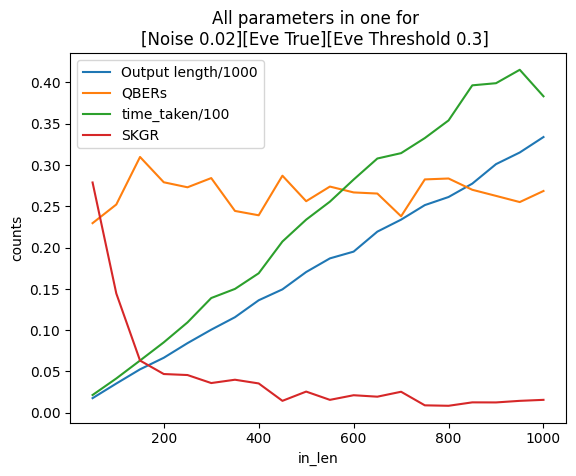

In [20]:
plt.plot(in_len, avg_out_len/1000, label = "Output length/1000")
plt.plot(in_len, avg_QBERs, label = "QBERs")
plt.plot(in_len, avg_time_taken/100, label = "time_taken/100")
plt.plot(in_len, SKGR, label = 'SKGR')

plt.xlabel('in_len')
plt.ylabel('counts')
plt.title(f'All parameters in one for {title}')
plt.legend()

print(f'All_parameters[Noise {ch_noise}]')